In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.ticker import PercentFormatter

import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Features

In [4]:
column_target = ['Survived']
columns_train = ['Pclass', 'Sex', 'Age', 'Fare']
X = data[columns_train]
Y = data[column_target].values.ravel()
columns_x_train = ['Pclass', 'Sex', 'Age', 'Fare']
Xt = test[columns_x_train]

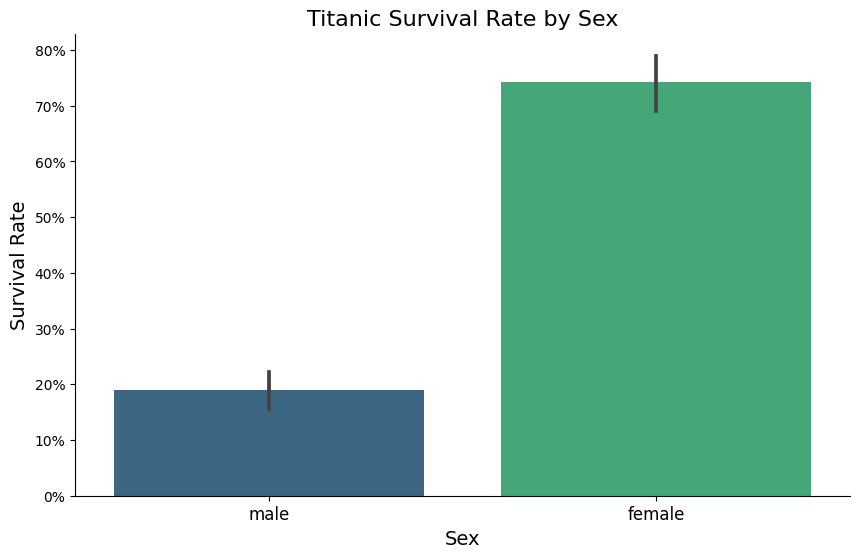

In [5]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x="Sex", y="Survived", palette='viridis')

# Add title and labels
ax.set_title('Titanic Survival Rate by Sex', fontsize=16)
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Survival Rate', fontsize=14)

# Customize the tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter(1))

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

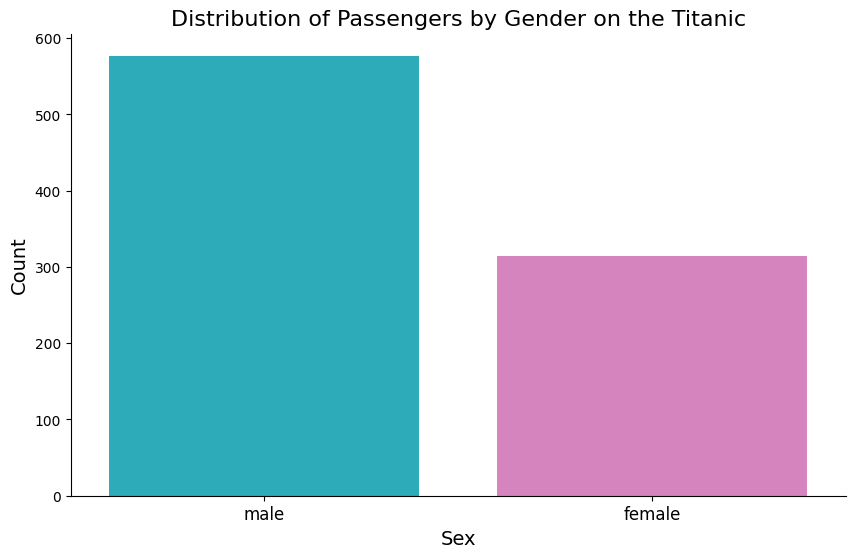

In [6]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Sex', palette=["#17becf", "#e377c2"])

# Add title and labels
ax.set_title('Distribution of Passengers by Gender on the Titanic', fontsize=16)
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize the tick labels (increased fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

In [7]:
X['Sex'].isnull().sum()

0

In [8]:
Xt['Sex'].isnull().sum()

0

In [9]:
X['Pclass'].isnull().sum()

0

In [10]:
X['Fare'].isnull().sum()

0

In [11]:
X['Age'].isnull().sum()

177

In [12]:
Xt['Fare'].isnull().sum()

1

In [13]:
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

In [14]:
Xt['Age'] = Xt['Age'].fillna(Xt['Age'].median())
Xt['Fare'] = Xt['Fare'].fillna(Xt['Fare'].median())

In [15]:
X['Age'].isnull().sum()

0

In [16]:
d={'male':0,'female':1}

In [17]:
X['Sex'] = X['Sex'].apply(lambda x:d[x])

In [18]:
Xt['Sex'] = Xt['Sex'].apply(lambda x:d[x])

In [19]:
Xt

,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875
...,...,...,...,...
413,3,0,27.0,8.0500
414,1,1,39.0,108.9000
415,3,0,38.5,7.2500
416,3,0,27.0,8.0500


Logistic Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#model = LogisticRegression(max_iter=200)
#model.fit(X_train, y_train)
model = LogisticRegression(max_iter=200)
model.fit(X, Y)

LogisticRegression(max_iter=200)

In [24]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [25]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

In [26]:
print(f'Accuracy on training set: {train_accuracy:.2f}')
print('Classification Report on training set:')
print(train_report)

print(f'Accuracy on test set: {test_accuracy:.2f}')
print('Classification Report on test set:')
print(test_report)

Accuracy on training set: 0.80
Classification Report on training set:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       392
           1       0.74      0.71      0.72       231

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.78       623
weighted avg       0.80      0.80      0.80       623

Accuracy on test set: 0.80
Classification Report on test set:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

